### 1. Импортировать библиотеки в Python.

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
# import cupy as cp

### 2. Загрузка и подготовка данных.

In [189]:
name = random.choice(os.listdir("dataset"))
print(f"Dataset: {name}")

dataset = np.genfromtxt(f"dataset/{name}", delimiter=',')

dataset = [dataset[:, i] for i in range(dataset.shape[1])]
title = ["time", "current", "voltage"]

dataset_dict = dict(zip(title, dataset))

Dataset: testLab1Var31.csv


### 3. Нарисовать графики тока и напряжения.

Для удобства отображения отображу не весь график, а некоторый его случайный диапазон заданного размера, установив лимиты на данные.

In [190]:
"""
Размер интервала
"""
time_period = 0.5

In [191]:
time_interval = random.random() * (dataset_dict["time"][-1] - time_period)
time_interval = (time_interval, time_interval + time_period)

print(f"Временной интервал {time_interval}")

Временной интервал (31.12754696027087, 31.62754696027087)


Text(0, 0.5, 'Сила Тока, А')

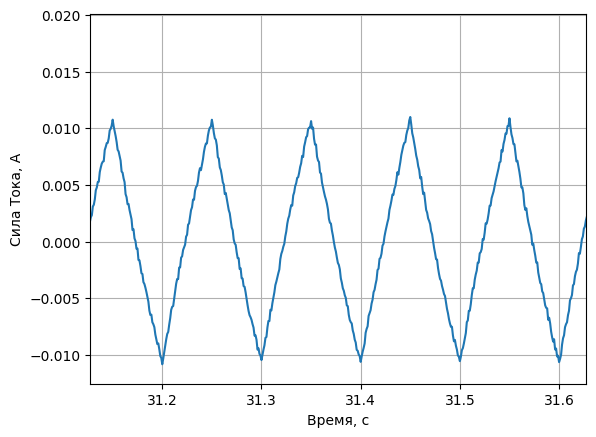

In [192]:
plt.plot(dataset_dict["time"], dataset_dict["current"])
plt.xlim(time_interval)
plt.grid()
plt.xlabel('Время, с')
plt.ylabel('Сила Тока, А')

Text(0, 0.5, 'Напряжение, В')

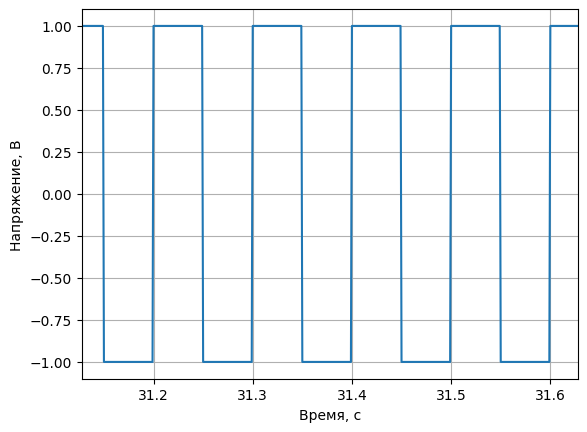

In [193]:
plt.plot(dataset_dict["time"], dataset_dict["voltage"])
plt.xlim(time_interval)
plt.grid()
plt.xlabel('Время, с')
plt.ylabel('Напряжение, В')

### 4. Рассчитать значения параметров L и R.

Упрощённая модель двигателя постоянного тока. Модель двигателя постоянного тока описывается следующей системой дифференциальных уравнений:

di/dt = 1 / L * u - R / L * i - Ce

dΩ/dt = Ce / J * i - 1 / J * Md

Y = K*X

I(k) = (Ts / L) * U(k-1) - ((R*Ts - L) / L) * I(k-1)

I(k) = K1 * U(k-1) + K2 * I(k-1)



In [194]:
X = np.transpose(np.concatenate([np.array([dataset_dict["voltage"], ]), np.array([dataset_dict["current"], ])], axis=0))
Y = np.transpose(np.array([dataset_dict["current"], ]))

# X = X[1000:10000,:]
# Y = Y[1000:10000,:]

In [195]:
# [I(k)] = K * [U(k-1);I(k-1)]
# Y = K * X

X = X[:-1, :]  # U(k-1);I(k-1)
Y = Y[1:, :]  # I(k)

print(X.shape)
print(Y.shape)

(100000, 2)
(100000, 1)


In [196]:
# K = Y * ~X^-1
# ~X^-1 = ((X' * X)^(-1) * X')

X_subinv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

K = np.dot(X_subinv, Y)

print(K)


[[4.32700256e-04]
 [9.92483596e-01]]


In [197]:
Td = 0.001

R_est = []
L_est = []

if K[1] > 0:
    R = 1 / K[0] * (1 - K[1])
    T = -Td / np.log(K[1])
    R_est.append(R)
    L_est.append(T * R)

R_est = np.array(R_est)
L_est = np.array(L_est)

In [ ]:
print('Mean value of R: ', np.mean(R_est), ' Ohm')
print('Standart deviation of R: ', np.std(R_est))
print('Mean value of L = ', np.mean(L_est), ' Hn')
print('Standart deviation of R: ', np.std(L_est))
